In [ ]:
#  light curve
- Junfei 

[ 2.          0.01035534 -0.1        -0.06035534  0.3       ] [-0.025 -0.1    0.025]


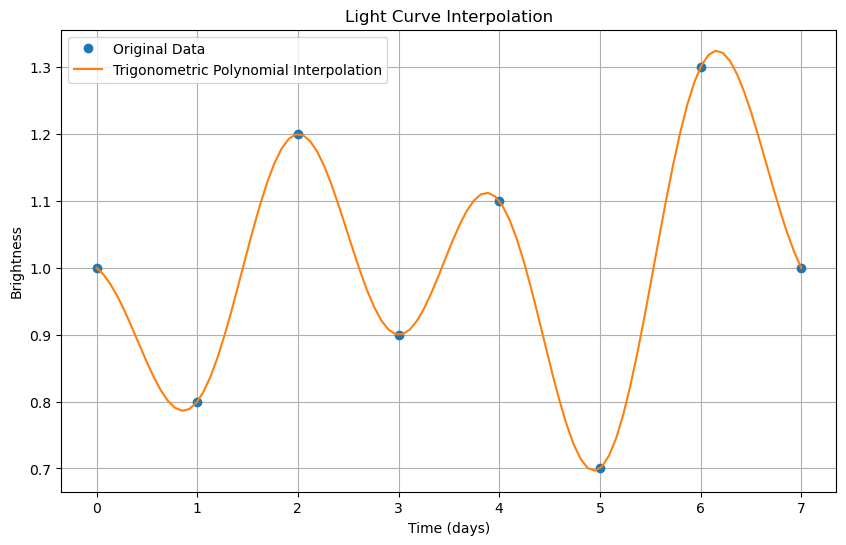

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Define the light curve data points
times = np.array([0, 1, 2, 3, 4, 5, 6, 7])
brightness = np.array([1.0, 0.8, 1.2, 0.9, 1.1, 0.7, 1.3, 1.0])

n = len(times)
m = n // 2

# Function to compute interpolation parameters
def computeparams(dataxs, datays):
    n = dataxs.size
    m = n // 2
    aparams = np.zeros(m + 1)
    bparams = np.zeros(m - 1)
    
    for k in range(m + 1):
        aparams[k] = datays @ np.cos(2 * pi * k * dataxs / n) / m
    for k in range(1, m):
        bparams[k - 1] = datays @ np.sin(2 * pi * k * dataxs / n) / m
    return aparams, bparams

# Function to perform trigonometric interpolation
def triginterp(aparams, bparams, x):
    n = aparams.size + bparams.size
    m = n // 2
    val = 0.5 * (aparams[0] + aparams[-1] * np.cos(2 * pi * m * x / n))
    for k in range(1, m):
        val += aparams[k] * np.cos(2 * pi * k * x / n)
        val += bparams[k - 1] * np.sin(2 * pi * k * x / n)
    return val

# Compute interpolation parameters
aparams, bparams = computeparams(times, brightness)
print(aparams, bparams)

# Generate interpolation points and compute interpolated values
num_interp_points = 100
interp_times = np.linspace(0, 7, num_interp_points)
interp_brightness = np.array([triginterp(aparams, bparams, t) for t in interp_times])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(times, brightness, 'o', label='Original Data')
plt.plot(interp_times, interp_brightness, '-', label='Trigonometric Polynomial Interpolation')
plt.title('Light Curve Interpolation')
plt.xlabel('Time (days)')
plt.ylabel('Brightness')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
from math import pi
import numpy as np

def f(x):
    return np.exp(np.sin(2*x))

def generatedata(n,f):
    dataxs = 2*pi*np.arange(n)/n
    datays = f(dataxs)
    return dataxs, datays

def computeparams(dataxs,datays):
    n = dataxs.size
    m = n//2
    aparams = np.zeros(m+1)
    bparams = np.zeros(m-1)
    
    for k in range(m+1):
        aparams[k] = datays@np.cos(k*dataxs)/m
    for k in range(1,m):
        bparams[k-1] = datays@np.sin(k*dataxs)/m
    return aparams, bparams

def triginterp(aparams,bparams,x):
    n = aparams.size + bparams.size
    m = n//2
    val = 0.5*(aparams[0] + aparams[-1]*np.cos(m*x))
    for k in range(1,m):
        val += aparams[k]*np.cos(k*x)
        val += bparams[k-1]*np.sin(k*x)
    return val

if __name__ == '__main__':
    dataxs, datays = generatedata(8, f)
    aparams, bparams = computeparams(dataxs, datays)
    x = 0.3; pofx = triginterp(aparams, bparams, x)
    print(x,pofx)


0.3 1.8367140864577463
